## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 109.5/109.5 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.8 MB 17.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.7/3.8 MB 8.9 MB/s eta 0:00:01
   ------------- -------------------------- 1.3/3.8 MB 10.2 MB/s eta 0:00:01
   ------------------ --------------------- 1.8/3.8 MB 10.2 MB/s eta 0:00:01
   ---------------------- ----------------- 2.2/3.8 MB 9.8 MB/s eta 0:00:01
   --------------------------- ------------ 2.6/3.8 MB 9.7 MB/s eta 0:00:01
   -------------------------------- ------- 3.1/3.8 MB 9.8 MB/s eta 0:00:01
   ------------------------------------- -- 3.6/3.8 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 9.7 MB/s eta 0:00:00


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

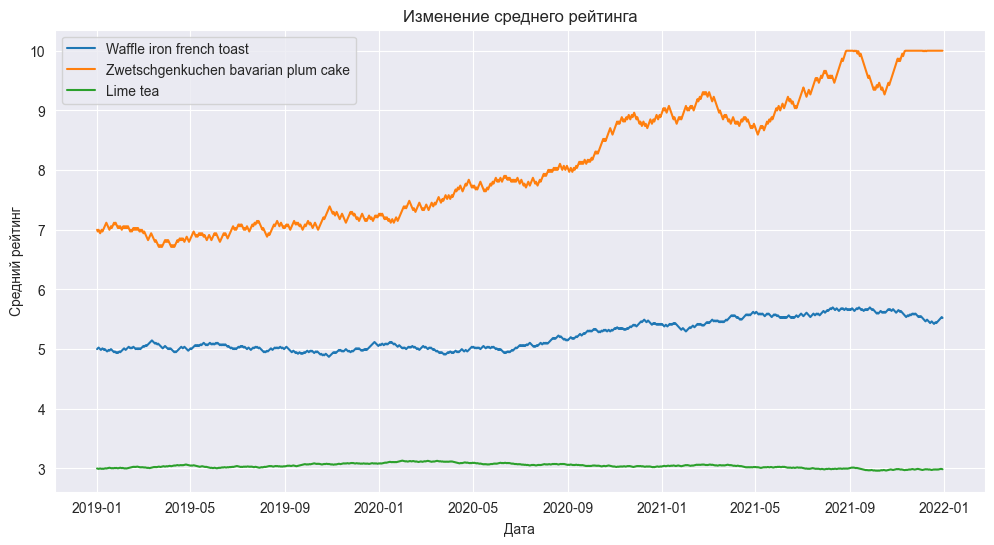

In [33]:
from datetime import datetime, timedelta

data = np.load('average_ratings.npy')

recipes = ['Waffle iron french toast', 'Zwetschgenkuchen bavarian plum cake', 'Lime tea']

# Дни от 01.01.2019 до 30.12.2021
start_date = datetime(2019, 1, 1)
days = [start_date + timedelta(days=i) for i in range(len(data[0]))]
# days = np.arange(len(data[0]))

# Размер
plt.figure(figsize=(12, 6))

for i in range(len(data)):
    # Графики, цвет случаен
    plt.plot(days, data[i], label=recipes[i])

plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга')

# Легенда графика для определения типов по цветам
plt.legend()

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


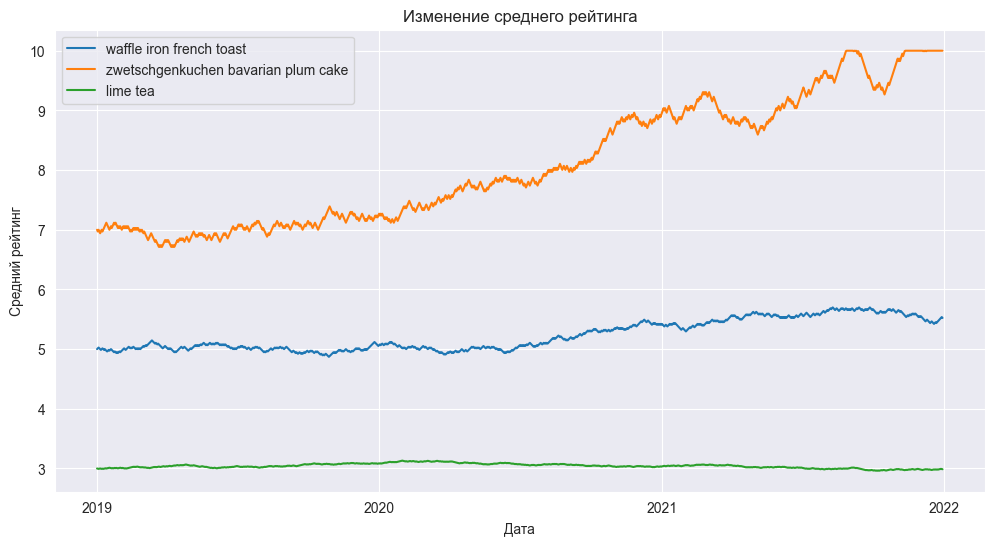

In [28]:
import matplotlib.dates as mdates
from datetime import datetime

data = np.load('average_ratings.npy')

recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

# Дни от 01.01.2019 до 30.12.2021
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 31)
days = mdates.drange(start_date, end_date, timedelta(days=1))

# Построение графика
plt.figure(figsize=(12, 6))

for i in range(len(data)):
    plt.plot(days, data[i], label=recipes[i])

plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга')
plt.legend()

# plt.xticks(rotation=45)  # Если не помещается
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# plt.tight_layout()

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

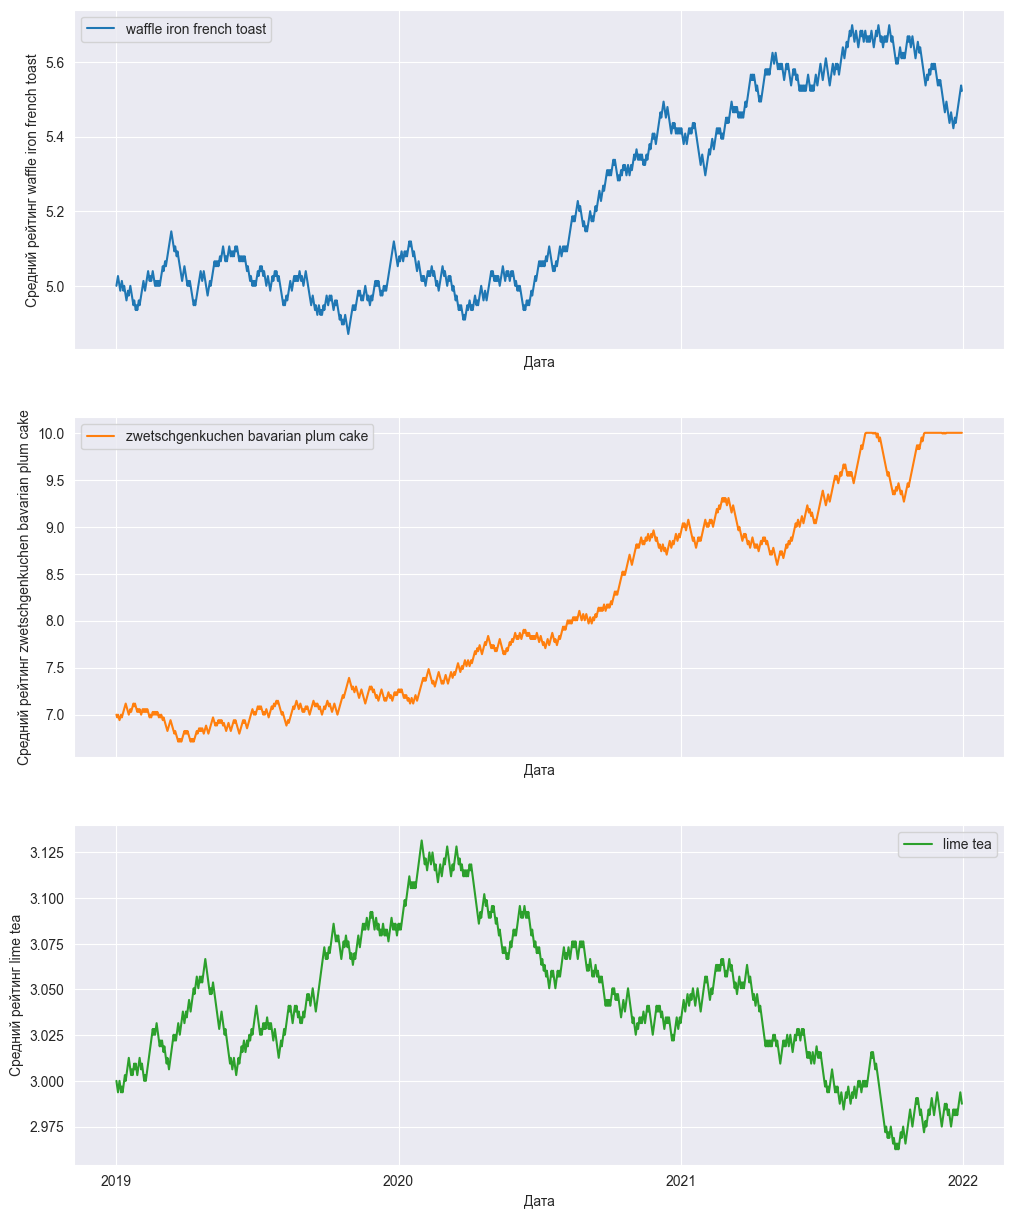

In [37]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta

data = np.load('average_ratings.npy')

recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

# Дни от 01.01.2019 до 30.12.2021
start_date = datetime(2019, 1, 1)
end_date = datetime(2021, 12, 31)
days = mdates.drange(start_date, end_date, timedelta(days=1))

# Создание трех отдельных графиков, расположенных один под другим
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(3):
    axs[i].plot(days, data[i], label=recipes[i], color=colors[i])
    axs[i].set_xlabel('Дата')
    axs[i].set_ylabel('Средний рейтинг ' + recipes[i])
    axs[i].legend()
    
    # Можно было и на весь график, но зато лучше, когда графики стоят отдельно по X при отключении sharex=True
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_minor_locator(mdates.MonthLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# plt.tight_layout()

plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


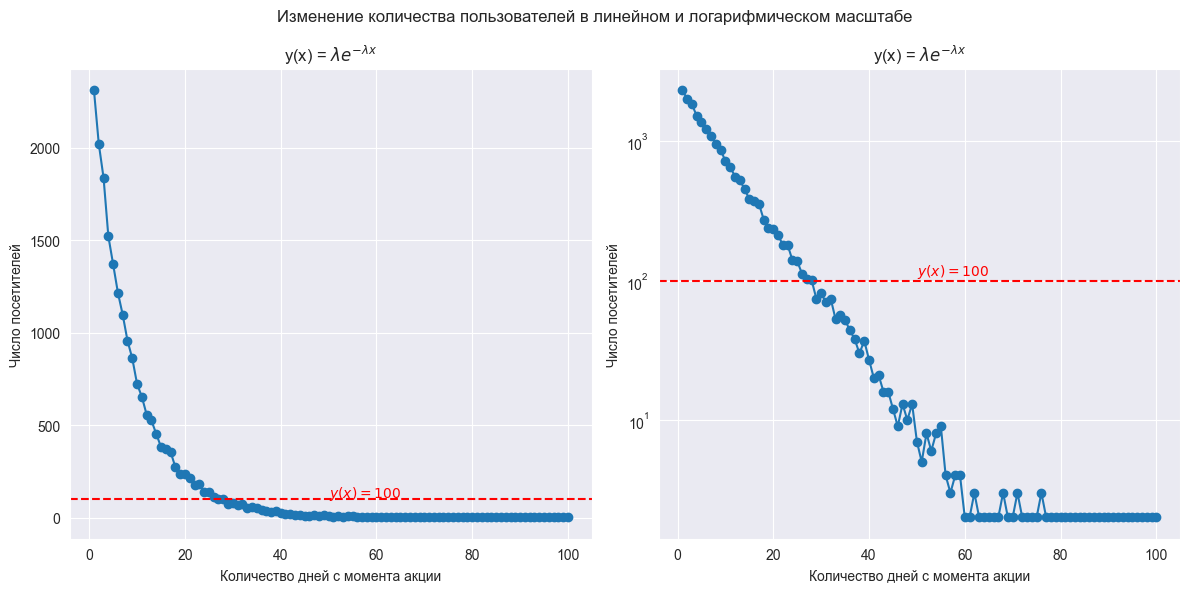

In [53]:
data = np.load('visitors.npy')
days = np.arange(1, len(data) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# График в линейном масштабе
# Бывают ., o, s, ^ и многие другие маркеры
ax1.plot(days, data, marker='o')
ax1.set_title('y(x) = $\lambda e^{-\lambda x}$')
ax1.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
# Красная горизонтальная линия пунктиром (--) на уровне y=100
ax1.axhline(y=100, color='r', linestyle='--')
ax1.text(50, 110, '$y(x)=100$', color='r')
# Можно ограничить
# ax1.set_ylim(0, 150)

# График в логарифмическом масштабе
# Как .plot(), но для логарифмического мастаба
ax2.semilogy(days, data, marker='o')
ax2.set_title('y(x) = $\lambda e^{-\lambda x}$')
ax2.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
ax2.axhline(y=100, color='r', linestyle='--')
ax2.text(50, 110, '$y(x)=100$', color='r')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

plt.tight_layout()
plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

recipes = pd.read_csv('recipes_sample.csv', header=0)
reviews = pd.read_csv('reviews_sample.csv', header=0)

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

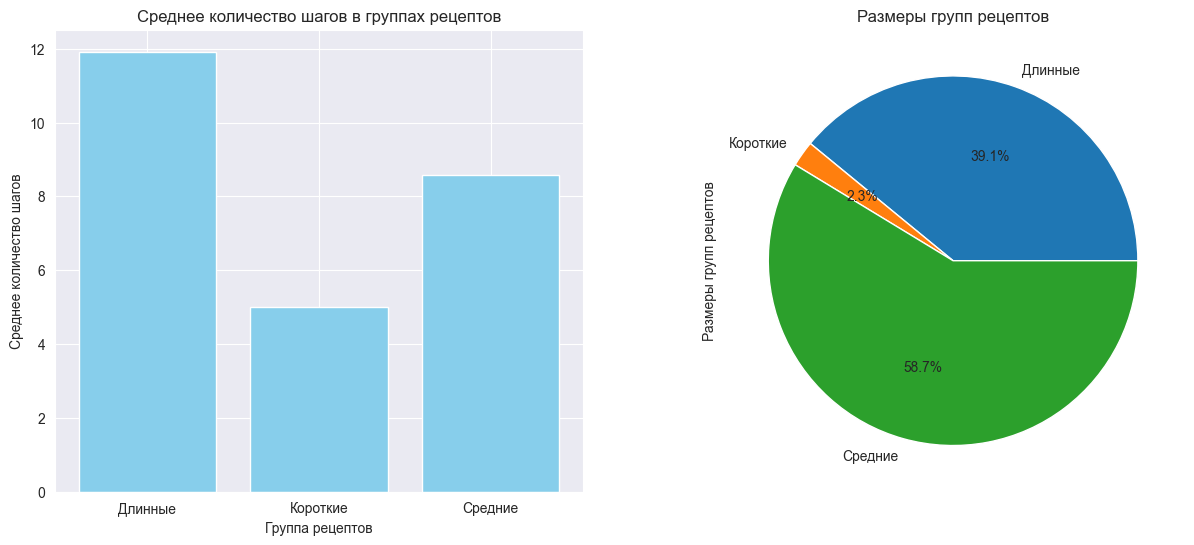

In [15]:
recipes['recipe_duration_category'] = recipes['minutes'].apply(lambda minutes: 'Короткие' if minutes < 5 else 'Средние' if minutes < 50 else 'Длинные')
grouped_recipes = recipes.groupby('recipe_duration_category').agg({
    'n_steps': 'mean',
    'name': 'size'
}).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Столбчатая диаграмма
ax1.bar(grouped_recipes['recipe_duration_category'], grouped_recipes['n_steps'], color='skyblue')
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Среднее количество шагов')
ax1.set_title('Среднее количество шагов в группах рецептов')

# Круговая диаграмма
ax2.pie(grouped_recipes['name'], labels=grouped_recipes['recipe_duration_category'], autopct='%1.1f%%') # startangle=90
ax2.set_ylabel('Размеры групп рецептов')
ax2.set_title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

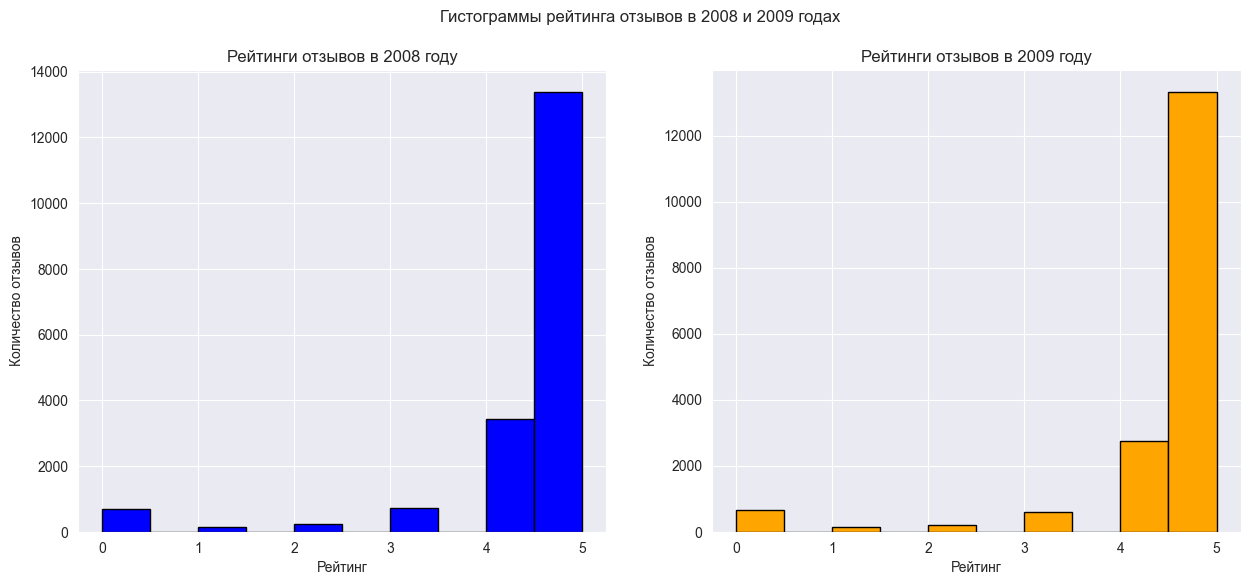

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

reviews['date'] = pd.to_datetime(reviews['date'])

# Фильтрация отзывов, 2008-2009 г.
filtered_date_reviews = reviews[(reviews['date'].dt.year >= 2008) & (reviews['date'].dt.year <= 2009)]
reviews_2008 = filtered_date_reviews[filtered_date_reviews['date'].dt.year == 2008]
reviews_2009 = filtered_date_reviews[filtered_date_reviews['date'].dt.year == 2009]

# Построение гистограмм
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Левая гистограмма (2008 год)
reviews_2008['rating'].plot.hist(ax=axes[0], color='blue', edgecolor='black')
axes[0].set_title('Рейтинги отзывов в 2008 году')
axes[0].set_xlabel('Рейтинг')
axes[0].set_ylabel('Количество отзывов')

# Правая гистограмма (2009 год)
reviews_2009['rating'].plot.hist(ax=axes[1], color='orange', edgecolor='black')
axes[1].set_title('Рейтинги отзывов в 2009 году')
axes[1].set_xlabel('Рейтинг')
axes[1].set_ylabel('Количество отзывов')

# Основной заголовок
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

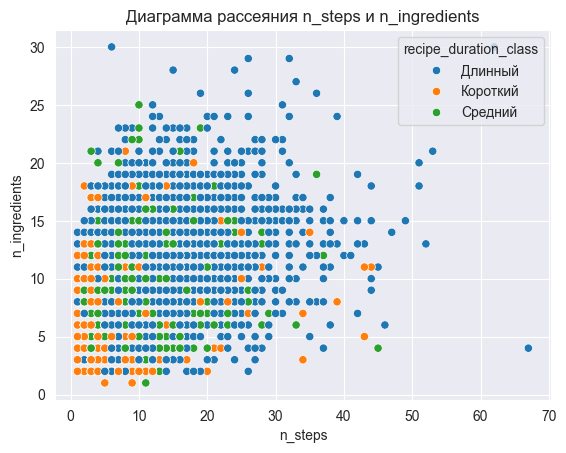

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

recipes['recipe_duration_class'] = recipes['minutes'].apply(lambda minutes: 'Короткий' if minutes <= 15 else 'Средний' if minutes <= 30 else 'Длинный')

# Диаграмма рассеяния
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='recipe_duration_class')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

##### Да, прямая линейная зависимость 

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

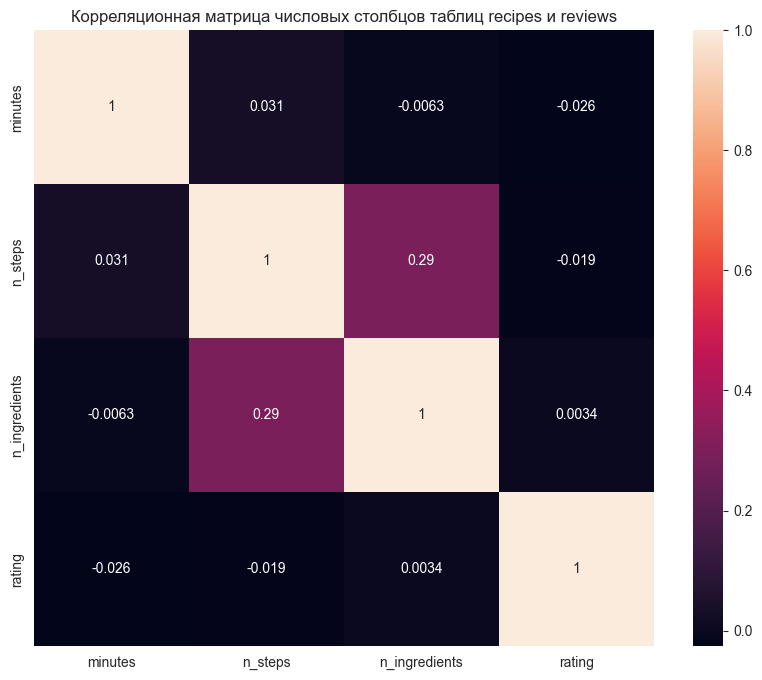

In [32]:
import seaborn as sns

merged_df = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')
important_columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']

# Корреляционная матрица
correlation_matrix = merged_df[important_columns].corr()

plt.figure(figsize=(10, 8))
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')

# Тепловая карта
sns.heatmap(correlation_matrix, annot=True) # cmap='YlOrRd' или другой стиль

plt.show()